In [13]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

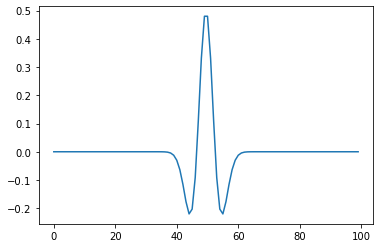

In [20]:
points = 100
a = 3.0
wave = signal.ricker(points, a) # (Number of points, Width)
wave = np.array(wave, dtype=np.float32)
plt.plot(wave)
plt.show()

#### Make Model

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(1,))
x = layers.Dense(126, activation='relu')(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

#### Prepare data

In [22]:
train_data = np.arange(points) / points
train_labels = wave

#### Training

In [25]:
model.compile(optimizer="adam",
    loss="MSE",
    metrics=["accuracy"])
model.fit(train_data, train_labels, epochs=400, batch_size=64)

Epoch 1/400
2/2 [==============================] - 0s 24ms/step - loss: 0.0132 - accuracy: 0.1800
Epoch 2/400
2/2 [==============================] - 0s 38ms/step - loss: 0.0057 - accuracy: 0.1800
Epoch 3/400
2/2 [==============================] - 0s 11ms/step - loss: 0.0209 - accuracy: 0.1800
Epoch 4/400
2/2 [==============================] - 0s 28ms/step - loss: 0.0039 - accuracy: 0.1800
Epoch 5/400
2/2 [==============================] - 0s 16ms/step - loss: 0.0067 - accuracy: 0.1800
Epoch 6/400
2/2 [==============================] - 0s 11ms/step - loss: 0.0116 - accuracy: 0.1800
Epoch 7/400
2/2 [==============================] - 0s 19ms/step - loss: 0.0045 - accuracy: 0.1800
Epoch 8/400
2/2 [==============================] - 0s 15ms/step - loss: 0.0020 - accuracy: 0.1800
Epoch 9/400
2/2 [==============================] - 0s 17ms/step - loss: 0.0057 - accuracy: 0.1800
Epoch 10/400
2/2 [==============================] - 0s 17ms/step - loss: 0.0041 - accuracy: 0.1800
Epoch 11/400
2/2 [=

Epoch 82/400
2/2 [==============================] - 0s 6ms/step - loss: 2.9682e-05 - accuracy: 0.1800
Epoch 83/400
2/2 [==============================] - 0s 5ms/step - loss: 4.4480e-05 - accuracy: 0.1800
Epoch 84/400
2/2 [==============================] - 0s 5ms/step - loss: 1.8487e-05 - accuracy: 0.1800
Epoch 85/400
2/2 [==============================] - 0s 6ms/step - loss: 5.5776e-05 - accuracy: 0.1800
Epoch 86/400
2/2 [==============================] - 0s 7ms/step - loss: 3.7440e-05 - accuracy: 0.1800
Epoch 87/400
2/2 [==============================] - 0s 6ms/step - loss: 3.2195e-05 - accuracy: 0.1800
Epoch 88/400
2/2 [==============================] - 0s 5ms/step - loss: 2.9921e-05 - accuracy: 0.1800
Epoch 89/400
2/2 [==============================] - 0s 5ms/step - loss: 3.8702e-05 - accuracy: 0.1800
Epoch 90/400
2/2 [==============================] - 0s 6ms/step - loss: 2.9976e-05 - accuracy: 0.1800
Epoch 91/400
2/2 [==============================] - 0s 5ms/step - loss: 4.7215e-05

2/2 [==============================] - 0s 5ms/step - loss: 3.7497e-06 - accuracy: 0.1800
Epoch 162/400
2/2 [==============================] - 0s 5ms/step - loss: 1.4612e-05 - accuracy: 0.1800
Epoch 163/400
2/2 [==============================] - 0s 6ms/step - loss: 2.0772e-05 - accuracy: 0.1800
Epoch 164/400
2/2 [==============================] - 0s 6ms/step - loss: 1.1577e-05 - accuracy: 0.1800
Epoch 165/400
2/2 [==============================] - 0s 5ms/step - loss: 2.8060e-05 - accuracy: 0.1800
Epoch 166/400
2/2 [==============================] - 0s 5ms/step - loss: 4.6751e-05 - accuracy: 0.1800
Epoch 167/400
2/2 [==============================] - 0s 5ms/step - loss: 1.8772e-05 - accuracy: 0.1800
Epoch 168/400
2/2 [==============================] - 0s 8ms/step - loss: 6.9651e-05 - accuracy: 0.1800
Epoch 169/400
2/2 [==============================] - 0s 6ms/step - loss: 1.3280e-04 - accuracy: 0.1800
Epoch 170/400
2/2 [==============================] - 0s 5ms/step - loss: 9.6504e-05 - a

2/2 [==============================] - 0s 5ms/step - loss: 6.1783e-04 - accuracy: 0.1800
Epoch 241/400
2/2 [==============================] - 0s 7ms/step - loss: 1.6596e-04 - accuracy: 0.1800
Epoch 242/400
2/2 [==============================] - 0s 5ms/step - loss: 4.0914e-04 - accuracy: 0.1800
Epoch 243/400
2/2 [==============================] - 0s 5ms/step - loss: 1.3533e-04 - accuracy: 0.1800
Epoch 244/400
2/2 [==============================] - 0s 5ms/step - loss: 7.9489e-04 - accuracy: 0.1800
Epoch 245/400
2/2 [==============================] - 0s 6ms/step - loss: 2.4346e-04 - accuracy: 0.1800
Epoch 246/400
2/2 [==============================] - 0s 11ms/step - loss: 3.3820e-04 - accuracy: 0.1800
Epoch 247/400
2/2 [==============================] - 0s 7ms/step - loss: 4.0154e-04 - accuracy: 0.1800
Epoch 248/400
2/2 [==============================] - 0s 6ms/step - loss: 1.3460e-04 - accuracy: 0.1800
Epoch 249/400
2/2 [==============================] - 0s 5ms/step - loss: 1.1029e-04 - 

2/2 [==============================] - 0s 4ms/step - loss: 2.5793e-06 - accuracy: 0.1800
Epoch 320/400
2/2 [==============================] - 0s 4ms/step - loss: 3.4860e-06 - accuracy: 0.1800
Epoch 321/400
2/2 [==============================] - 0s 4ms/step - loss: 2.0648e-06 - accuracy: 0.1800
Epoch 322/400
2/2 [==============================] - 0s 3ms/step - loss: 3.1126e-06 - accuracy: 0.1800
Epoch 323/400
2/2 [==============================] - 0s 4ms/step - loss: 2.6718e-06 - accuracy: 0.1800
Epoch 324/400
2/2 [==============================] - 0s 3ms/step - loss: 2.4009e-06 - accuracy: 0.1800
Epoch 325/400
2/2 [==============================] - 0s 4ms/step - loss: 4.1524e-06 - accuracy: 0.1800
Epoch 326/400
2/2 [==============================] - 0s 4ms/step - loss: 3.9666e-06 - accuracy: 0.1800
Epoch 327/400
2/2 [==============================] - 0s 3ms/step - loss: 2.7842e-06 - accuracy: 0.1800
Epoch 328/400
2/2 [==============================] - 0s 4ms/step - loss: 7.4827e-06 - a

2/2 [==============================] - 0s 4ms/step - loss: 1.9880e-06 - accuracy: 0.1800
Epoch 399/400
2/2 [==============================] - 0s 4ms/step - loss: 2.1050e-06 - accuracy: 0.1800
Epoch 400/400
2/2 [==============================] - 0s 4ms/step - loss: 1.4730e-06 - accuracy: 0.1800


#### Inferencing

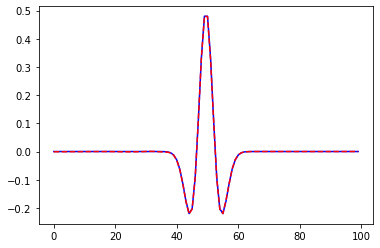

In [34]:
sample = train_data
wave_pred = model.predict(sample)
plt.plot(wave_pred, 'b')
plt.plot(wave, 'r--')
plt.show()